In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/abhay/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
ts_data = pd.read_csv("/home/abhay/Downloads/soil_impurity.csv")

In [3]:
ts_data.rename(columns={"Turbidity": "Impurity"}, inplace=True)

In [4]:
ts_data['Date'] = pd.to_datetime(ts_data['Date'], format='%d-%m-%Y')

In [5]:
ts_data.set_index('Date',inplace=True)

In [6]:
ts_data

,Impurity
Date,
2011-01-01,20.038210
2011-01-12,19.708710
2011-01-24,20.641247
2011-02-04,20.419380
2011-02-16,19.577298
...,...
2021-11-14,40.787799
2021-11-26,40.412594
2021-12-07,39.909099


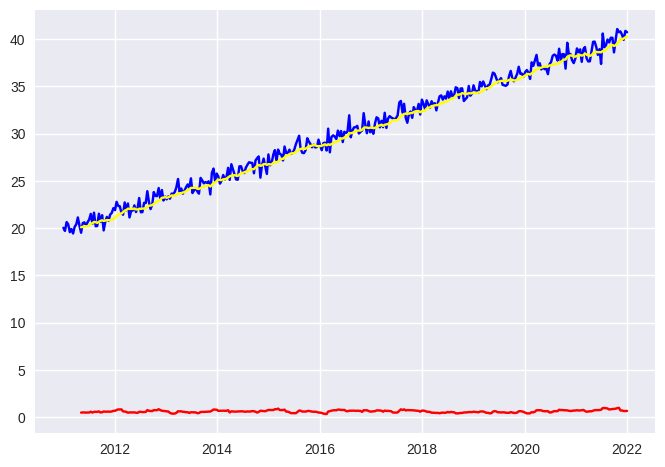

In [7]:
plt.style.use('seaborn')
rol_mean = ts_data.rolling(window=12).mean()
rol_std = ts_data.rolling(window=12).std()

plt.plot(ts_data, c='blue')
plt.plot(rol_mean, c='yellow')
plt.plot(rol_std, c='red')

In [8]:
from statsmodels.tsa.stattools import adfuller
dftest= adfuller(ts_data['Impurity'])
print(dftest)

(0.25205142906549727, 0.9750344672661402, 15, 334, {'1%': -3.450081345901191, '5%': -2.870232621465807, '10%': -2.571401168202517}, 664.8999100836352)


In [9]:
ts_data_new = ts_data['Impurity'] -  ts_data['Impurity'].shift(2)

In [10]:
adfuller(ts_data_new.dropna())

(-8.770878361614178,
 2.5230548519337962e-14,
 13,
 334,
 {'1%': -3.450081345901191,
  '5%': -2.870232621465807,
  '10%': -2.571401168202517},
 671.6367418700821)

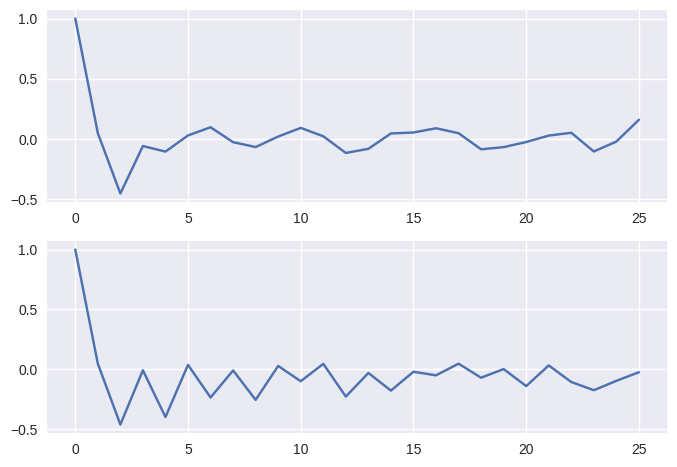

In [11]:
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(ts_data_new.dropna())
pacf_plot = pacf(ts_data_new.dropna())

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_data, seasonal_order=(2,2,1,12))
model_fit = model.fit()

/home/abhay/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/abhay/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/abhay/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
res = model_fit.forecast(24)

/home/abhay/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
res = pd.DataFrame(res)
res.columns=['Turbidity']
ts_data_pred = pd.DataFrame(ts_data)
ts_data_pred = ts_data_pred.append(res)


/tmp/ipykernel_4308/674057164.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_data_pred = ts_data_pred.append(res)


In [16]:
from datetime import datetime, timedelta

start_date = datetime(2022, 1, 1)

date_list = []
for i in range(len(ts_data_pred[350:])):
    date_list.append(start_date + timedelta(days=i*11))

In [17]:
temp = ts_data_pred[350:].reset_index()
temp['index'] =  date_list

In [18]:
temp.set_index('index',inplace=True)

In [19]:
ts_data

,Impurity
Date,
2011-01-01,20.038210
2011-01-12,19.708710
2011-01-24,20.641247
2011-02-04,20.419380
2011-02-16,19.577298
...,...
2021-11-14,40.787799
2021-11-26,40.412594
2021-12-07,39.909099


# prediction


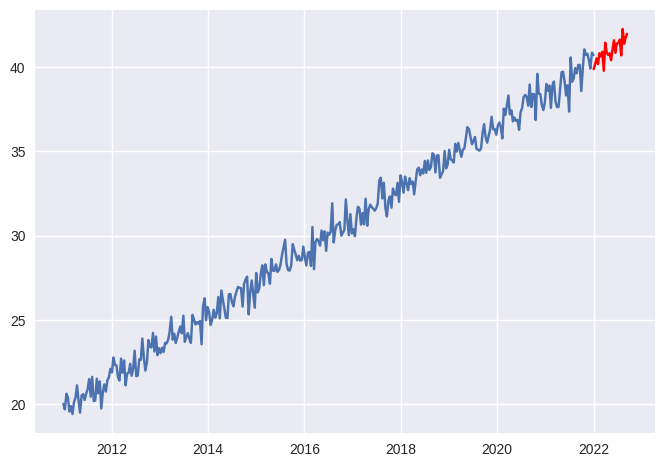

In [20]:
plt.plot(ts_data)
plt.plot(temp,c='red')

In [21]:
final = pd.concat([ts_data,temp])

In [27]:
final.head(30)

,Impurity
2011-01-01,20.038210
2011-01-12,19.708710
2011-01-24,20.641247
2011-02-04,20.419380
2011-02-16,19.577298
2011-02-27,19.904306
2011-03-11,19.433699
2011-03-22,20.127961
2011-04-03,20.415344
2011-04-14,21.132568
